In [1]:
from sklearn.preprocessing import StandardScaler
from visualization_fct import *
# from bokeh.plotting import output_file, show, save

from sklearn.mixture import GaussianMixture
from bokeh.plotting import output_notebook, show

import matplotlib.pyplot as plt  # , mpld3
%matplotlib notebook
output_notebook()

data = pd.read_csv("../asm_data/asm_data_for_ml.txt", sep='\t')
del data['MJD']
# del data['error']
# del data['errorA']
# del data['errorB']
# del data['errorC']
data['rateCA'] = data.rateC / data.rateA
data_thr = mask(data, 'orbit')  # rm too large values except for 'orbit'


del data_thr['error']
del data_thr['errorA']
del data_thr['errorB']
del data_thr['errorC']


np.random.seed(1)

X = np.c_[data_thr.rateCA, data_thr.rate]

Loading BokehJS ...

<IPython.core.display.Javascript object>


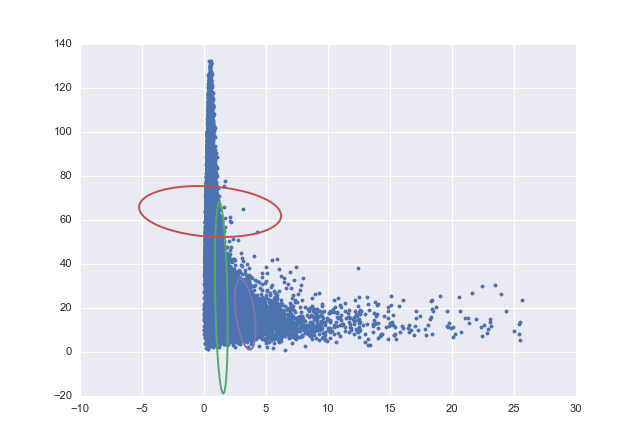

In [2]:
gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=5)
gmm.fit(X)  # , weights=w) not implemented in sklearn yet
preds = gmm.predict(X)
probs = gmm.predict_proba(X)

data_thr['preds'] = pd.Series(preds).astype("category")

color_key = ["red", "blue", "yellow", "grey", "black", "purple", "pink",
             "brown", "green", "orange"]  # Spectral9
color_key = color_key[:len(set(preds))+1]

covs = gmm.covariances_
means = gmm.means_

plt.figure()
plt.plot(X[:,0], X[:,1], '.')
for n_comp in range(len(covs)):
    cov = covs[n_comp]
    mean = means[n_comp]
    v, w = np.linalg.eigh(cov)
    e0 = w[0] / np.linalg.norm(w[0])
    e1 = w[1] / np.linalg.norm(w[1])
    t = np.linspace(0, 2 * np.pi, 10000)
    # 4.605 corresponds to 90% quantile:
    a = (mean[0]
         + np.sqrt(4.605 * v[0]) * np.cos(t) * e0[0]
         + np.sqrt(4.605 * v[1]) * np.sin(t) * e1[0])
    b = (mean[1]
         + np.sqrt(4.605 * v[0]) * np.cos(t) * e0[1]
         + np.sqrt(4.605 * v[1]) * np.sin(t) * e1[1])


    plt.plot(a, b)  # , color=color_key[n_comp])

